# Fraud Detection using Self-Organizing Maps

In [ ]:
'''Aim is to predict the details of the customers who appear as frauds without training the NN(unsupervised learning). 
All the customers are input and output nodes consist of the corresponding weights. The BMUs(winning nodes) are found 
by calculating the Euclidean distance and weights are updated based on the nearest node and this process is repeated. 
Repeating the process reduces the dimensionality. These winning nodes are used to detect the outliers i.e frauds.

MIT- Mean Interneuron Distance is calculated to detect outliers. For this we need to specify the neighbourhood. And MIT is
calculated by measuring Euclidean distance btwn BMU and the node in the radius-specified neighbourhood.
Class in dataset:
     0-not approved, 1-approved'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv(r'C:\Users\Krishi Thiruppathi\Desktop\Credit_Card_Applications.csv')
dataset
# dataset encoded to protect confidentiality

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [6]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [46]:
import os
os.getcwd()

'C:\\Users\\Krishi Thiruppathi'

In [76]:
#Change directory
os.chdir('C:/Users/Krishi Thiruppathi/Desktop')

In [77]:
!pip install minisom

Defaulting to user installation because normal site-packages is not writeable


In [84]:
#Training a SOM-has no implementation on scikit learn
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5) # x & y indicate 10x10 grid,sigma is the radius of neighbourhood
som.random_weights_init(X) #initialize random weights in the beginning
som.train_random(data=X, num_iteration=100)

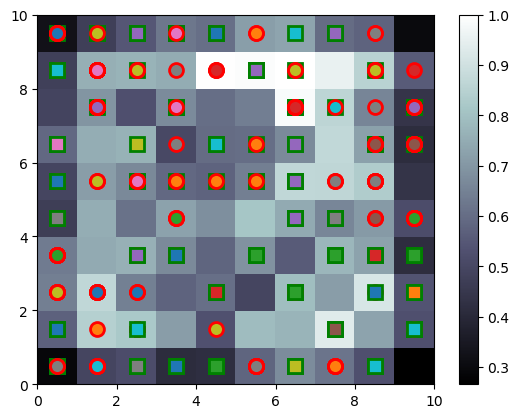

In [89]:
# Visualizing the results-plotting the SOM
# Higher the MIT, more is the winning node an outlier inside the neighbourhood. Larger the MIT, larger to white the color will be
from pylab import bone, pcolor, colorbar, plot, show
# initialize window to contain map
bone()
# add MIT distances for all winning nodes of SOM
pcolor(som.distance_map().T) # distance_map will return all the MIT in one matrix
colorbar() # dark colors are winning nodes

#red circles- customers with no approval
#green squares- customers with approval
markers=['o','s'] # indicate shape
colors=['r','g']

#i for indices and x for vectors of customer, w-winning node
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5, # to place the marker at the centre of the winning node
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = None,
         markersize = 10,
         markeredgewidth = 2) # the class col decides the marker based on approval/not approval
show()

In [97]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [98]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15711299
15570990
